In [1]:
#FINAL PROJECT: Diabetes Classification Without Using HBA1C or Blood Sugar
#Data source: https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.#

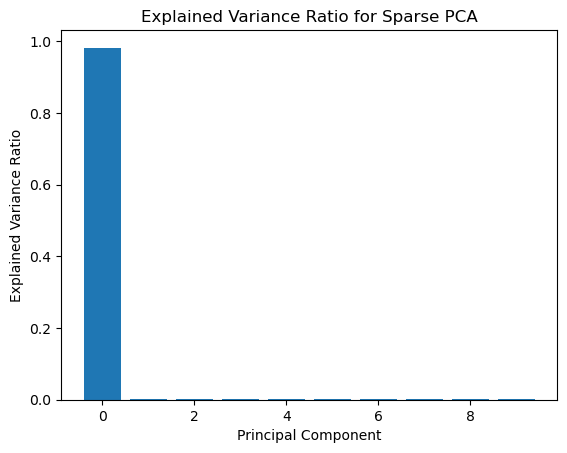

Sparse PCA Statistics:
Explained Variance Ratio:
Principal Component 1: 0.9825
Principal Component 2: 0.0030
Principal Component 3: 0.0025
Principal Component 4: 0.0019
Principal Component 5: 0.0023
Principal Component 6: 0.0017
Principal Component 7: 0.0018
Principal Component 8: 0.0016
Principal Component 9: 0.0012
Principal Component 10: 0.0015

Key Features:
Principal Component 1: Feature 0
Principal Component 2: Feature 2
Principal Component 3: Feature 9
Principal Component 4: Feature 1
Principal Component 5: Feature 8
Principal Component 6: Feature 6
Principal Component 7: Feature 4
Principal Component 8: Feature 5
Principal Component 9: Feature 10
Principal Component 10: Feature 14


In [8]:
#Analyze the dataset after running sparse PCA.  What do we know about the attributes?

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import SparsePCA
from sklearn.model_selection import train_test_split

# Get the current directory
current_dir = os.getcwd()

# Find the .csv file in the current directory
csv_files = [file for file in os.listdir(current_dir) if file.endswith(".csv")]

# Check if the .csv file exists
if "diabetes_data_upload.csv" in csv_files:
    dataset_file = os.path.join(current_dir, "diabetes_data_upload.csv")
else:
    raise FileNotFoundError("diabetes_data_upload.csv file not found in the current directory.")

# Define a data loader function
def load_dataset(file_path):
    # Load the dataset from the CSV file
    df = pd.read_csv(file_path)

    # Perform one-hot encoding for categorical variables
    df_encoded = pd.get_dummies(df, drop_first=True)

    # Extract the feature matrix X
    X = df_encoded.iloc[:, :-1].values

    # Extract the target variable y
    y = df_encoded.iloc[:, -1].values

    return X, y

# Load the dataset using the data loader
X, y = load_dataset(dataset_file)

# Initialize SparsePCA
sparse_pca = SparsePCA(n_components=10, random_state=42)

# Fit and transform the data
X_sparse = sparse_pca.fit_transform(X)

# Calculate the explained variance ratio manually
explained_variance = np.var(X_sparse, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

# Plot explained variance ratio
plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Sparse PCA')
plt.show()

# Identify key features
key_features = np.abs(sparse_pca.components_).argmax(axis=1)

# Print statistics, plots, and key features
print("Sparse PCA Statistics:")
print("Explained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio:.4f}")

print("\nKey Features:")
for i, feature_idx in enumerate(key_features):
    print(f"Principal Component {i+1}: Feature {feature_idx}")


#####
After PCA, perform Logistic Regression
#####

In [9]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sparse, y, test_size=0.2, random_state=42)

# Define hyperparameters for Logistic Regression
log_reg_params = {
    'penalty': 'l2',  # Regularization penalty ('l1', 'l2', 'elasticnet', 'none')
    'C': 1.0,  # Inverse of regularization strength
    'solver': 'lbfgs',  # Algorithm to use for optimization ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')
    'max_iter': 100,  # Maximum number of iterations
    'random_state': 42  # Random seed for reproducibility
}

# Initialize Logistic Regression with hyperparameters
log_reg = LogisticRegression(**log_reg_params)

# Fit the model
log_reg.fit(X_train, y_train)

# Predict the test set results
y_pred = log_reg.predict(X_test)


              precision    recall  f1-score   support

           0       0.71      0.82      0.76        33
           1       0.91      0.85      0.88        71

    accuracy                           0.84       104
   macro avg       0.81      0.83      0.82       104
weighted avg       0.85      0.84      0.84       104



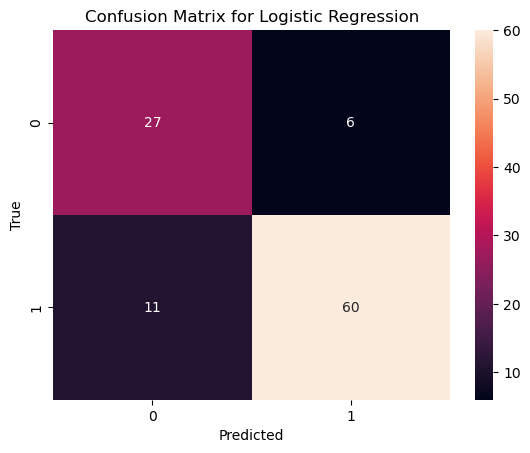

In [10]:
#Stats and plots for LogReg

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Fit the model and make predictions
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


######
2. Run Random Forest
#####

In [11]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
random_forest.fit(X_train, y_train)

# Predict the test set results
y_pred = random_forest.predict(X_test)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.96      0.98        71

    accuracy                           0.97       104
   macro avg       0.96      0.98      0.97       104
weighted avg       0.97      0.97      0.97       104



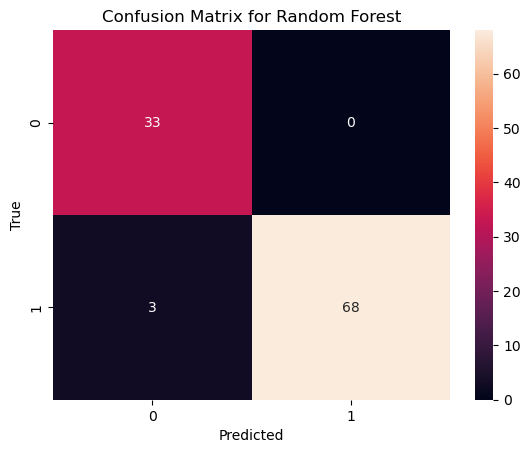

In [12]:
# Fit the model and make predictions
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Deep and Wide NN (4)

Think about early stopping

For PPT 
2-3 slides
1. What Why When ?
2. Method, Architecture
3. Results


In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Hyperparameters
hyper_params = {
    'batch_size': 256,
    'learning_rate': 0.01,
    'epochs': 100,
    'input_size': X_sparse.shape[1],
    'hidden_size': 500,
    'output_size': 1,
    'dropout_rate': 0.5,
}

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sparse, y, test_size=0.2, random_state=42)

# Convert to tensors
X_tensor = torch.tensor(X_train.astype(np.float32))
y_tensor = torch.tensor(y_train.astype(np.float32)).unsqueeze(1)

# Create a Dataset
dataset = TensorDataset(X_tensor, y_tensor)

# Create a DataLoader
data_loader = DataLoader(dataset, batch_size=hyper_params['batch_size'], shuffle=True)

# Use CUDA if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the Deep and Wide neural network
class DeepWideNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate):
        super(DeepWideNN, self).__init__()
        self.deep = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_size, output_size),
        )

    def forward(self, x):
        out = self.deep(x)
        return out

# Initialize the model, loss function, and optimizer
nn_model = DeepWideNN(
    input_size=hyper_params['input_size'],
    hidden_size=hyper_params['hidden_size'],
    output_size=hyper_params['output_size'],
    dropout_rate=hyper_params['dropout_rate']
).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(nn_model.parameters(), lr=hyper_params['learning_rate'])

# Training loop
for epoch in range(hyper_params['epochs']):
    for i, (inputs, labels) in enumerate(data_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = nn_model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}/{hyper_params["epochs"]}, Loss: {loss.item()}')

# Display the final loss
print(f"Final Loss: {loss.item()}")

# Save the model
torch.save(nn_model.state_dict(), "nn_model.pth")


Epoch 1/100, Loss: 0.7468841671943665
Epoch 2/100, Loss: 0.7295666933059692
Epoch 3/100, Loss: 0.7244654893875122
Epoch 4/100, Loss: 0.7191973924636841
Epoch 5/100, Loss: 0.6821480393409729
Epoch 6/100, Loss: 0.7536213994026184
Epoch 7/100, Loss: 0.6865415573120117
Epoch 8/100, Loss: 0.6392519474029541
Epoch 9/100, Loss: 0.7028945684432983
Epoch 10/100, Loss: 0.6493424773216248
Epoch 11/100, Loss: 0.6346212029457092
Epoch 12/100, Loss: 0.6674672365188599
Epoch 13/100, Loss: 0.6586460471153259
Epoch 14/100, Loss: 0.6551469564437866
Epoch 15/100, Loss: 0.6346305012702942
Epoch 16/100, Loss: 0.6577947735786438
Epoch 17/100, Loss: 0.6793652772903442
Epoch 18/100, Loss: 0.6681398749351501
Epoch 19/100, Loss: 0.598624587059021
Epoch 20/100, Loss: 0.623932957649231
Epoch 21/100, Loss: 0.6018718481063843
Epoch 22/100, Loss: 0.5718145370483398
Epoch 23/100, Loss: 0.5983207821846008
Epoch 24/100, Loss: 0.5557377934455872
Epoch 25/100, Loss: 0.6013635993003845
Epoch 26/100, Loss: 0.55372607707977

## Testing our Deep and Wide model

In [21]:
from sklearn.metrics import accuracy_score

# Assuming X_test and y_test are your test datasets

# Convert to tensors
X_test_tensor = torch.tensor(X_test.astype(np.float32))
y_test_tensor = torch.tensor(y_test.astype(np.float32)).unsqueeze(1)

# Move tensors to the device
X_test_tensor = X_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

# Load the model
nn_model = DeepWideNN(
    input_size=hyper_params['input_size'],
    hidden_size=hyper_params['hidden_size'],
    output_size=hyper_params['output_size'],
    dropout_rate=hyper_params['dropout_rate']
).to(device)
nn_model.load_state_dict(torch.load("nn_model.pth"))

# Set the model to evaluation mode
nn_model.eval()

# Make predictions
with torch.no_grad():
    y_pred = nn_model(X_test_tensor)

# Apply sigmoid function to output and convert to numpy
y_pred_np = torch.sigmoid(y_pred).cpu().numpy()

# Convert output probabilities to binary predictions (0 or 1)
y_pred_np = (y_pred_np > 0.5).astype(int)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_np)

print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 90.38%


In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class PyTorchClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, model, criterion, optimizer, epochs):
        self.model = model
        self.criterion = criterion
        self.optimizer = optimizer
        self.epochs = epochs

    def fit(self, X, y):
        dataset = TensorDataset(X, y)
        data_loader = DataLoader(dataset, batch_size=hyper_params['batch_size'], shuffle=True)

        for epoch in range(self.epochs):
            for i, (inputs, labels) in enumerate(data_loader):
                inputs, labels = inputs.to(device), labels.to(device)

                # Forward pass
                outputs = self.model(inputs)
                loss = self.criterion(outputs, labels)

                # Backward and optimize
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()

        return self

    def predict_proba(self, X):
        with torch.no_grad():
            outputs = self.model(X)
            probs = torch.sigmoid(outputs)
            return probs.cpu().numpy()

    def predict(self, X):
        probas = self.predict_proba(X)
        return (probas > 0.5).astype(int)

# Wrap the PyTorch model
nn_model_sklearn = PyTorchClassifier(model, criterion, optimizer, epochs=hyper_params['epochs'])

# Now, you can use nn_model_sklearn in your sklearn ensemble models


#####
After Random Forest, run Wide and Deep Network
#####

#####
After running all 3 models, perform ensemble methods of VOTING and STACKING.  Compare results
#####

In [22]:
#Voting and Stacking mechanisms for ensemble method

from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score

# Initialize the ensemble models
voting = VotingClassifier(estimators=[('lr', log_reg), ('rf', random_forest), ('nn', nn_model)], voting='soft')
stacking = StackingClassifier(estimators=[('lr', log_reg), ('rf', random_forest), ('nn', nn_model)], final_estimator=LogisticRegression())

# Fit the voting ensemble model
voting.fit(X_train, y_train)

# Predict the test set results
y_pred_voting = voting.predict(X_test)

# Fit the stacking ensemble model
stacking.fit(X_train, y_train)

# Predict the test set results
y_pred_stacking = stacking.predict(X_test)

# Calculate the accuracy of the voting ensemble
accuracy_voting = accuracy_score(y_test, y_pred_voting)

# Calculate the accuracy of the stacking ensemble
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)

# Print the accuracies
print(f'Accuracy of voting ensemble: {accuracy_voting}')
print(f'Accuracy of stacking ensemble: {accuracy_stacking}')

# Choose the better model
if accuracy_voting > accuracy_stacking:
    best_model = voting
else:
    best_model = stacking


ValueError: The estimator DeepWideNN should be a classifier.

In [ ]:
#Voting ensemble

# Fit the model and make predictions
voting.fit(X_train, y_train)
y_pred_voting = voting.predict(X_test)

# Print classification report
print("Classification Report for Voting Ensemble:")
print(classification_report(y_test, y_pred_voting))

# Print confusion matrix
cm_voting = confusion_matrix(y_test, y_pred_voting)
sns.heatmap(cm_voting, annot=True, fmt='d')
plt.title('Confusion Matrix for Voting Ensemble')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
#Stacking ensemble

# Fit the model and make predictions
stacking.fit(X_train, y_train)
y_pred_stacking = stacking.predict(X_test)

# Print classification report
print("Classification Report for Stacking Ensemble:")
print(classification_report(y_test, y_pred_stacking))

# Print confusion matrix
cm_stacking = confusion_matrix(y_test, y_pred_stacking)
sns.heatmap(cm_stacking, annot=True, fmt='d')
plt.title('Confusion Matrix for Stacking Ensemble')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
import numpy as np

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = {}

    def _calculate_gini(self, y):
        classes, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        gini = 1 - np.sum(probabilities**2)
        return gini

    def _split_dataset(self, X, y, feature_index, threshold):
        left_indices = np.where(X[:, feature_index] <= threshold)[0]
        right_indices = np.where(X[:, feature_index] > threshold)[0]
        X_left, y_left = X[left_indices], y[left_indices]
        X_right, y_right = X[right_indices], y[right_indices]
        return X_left, y_left, X_right, y_right

    def _find_best_split(self, X, y):
        best_gini = float('inf')
        best_feature_index = None
        best_threshold = None

        for feature_index in range(X.shape[1]):
            unique_values = np.unique(X[:, feature_index])
            thresholds = (unique_values[:-1] + unique_values[1:]) / 2

            for threshold in thresholds:
                X_left, y_left, X_right, y_right = self._split_dataset(X, y, feature_index, threshold)
                gini_left = self._calculate_gini(y_left)
                gini_right = self._calculate_gini(y_right)
                gini = (len(y_left) * gini_left + len(y_right) * gini_right) / len(y)

                if gini < best_gini:
                    best_gini = gini
                    best_feature_index = feature_index
                    best_threshold = threshold

        return best_feature_index, best_threshold

    def _build_tree(self, X, y, depth):
        if depth == self.max_depth or len(np.unique(y)) == 1:
            leaf_value = np.argmax(np.bincount(y))
            return leaf_value

        feature_index, threshold = self._find_best_split(X, y)
        X_left, y_left, X_right, y_right = self._split_dataset(X, y, feature_index, threshold)

        if len(y_left) == 0 or len(y_right) == 0:
            leaf_value = np.argmax(np.bincount(y))
            return leaf_value

        tree_node = {}
        tree_node['feature_index'] = feature_index
        tree_node['threshold'] = threshold
        tree_node['left'] = self._build_tree(X_left, y_left, depth + 1)
        tree_node['right'] = self._build_tree(X_right, y_right, depth + 1)
        return tree_node

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def _predict_sample(self, x, tree_node):
        if isinstance(tree_node, int):
            return tree_node

        if x[tree_node['feature_index']] <= tree_node['threshold']:
            return self._predict_sample(x, tree_node['left'])
        else:
            return self._predict_sample(x, tree_node['right'])

    def predict(self, X):
        predictions = []
        for x in X:
            prediction = self._predict_sample(x, self.tree)
            predictions.append(prediction)
        return np.array(predictions)


class RandomForest:
    def __init__(self, n_estimators=100, max_depth=None, max_features=None):
        self.n_estimators = n_estimators
       
        self.max_depth = max_depth
        self.max_features = max_features
        self.estimators = []

    def fit(self, X, y):
        self.estimators = []
        for _ in range(self.n_estimators):
            estimator = DecisionTree(max_depth=self.max_depth)
            sample_indices = np.random.choice(range(len(X)), size=len(X), replace=True)
            X_sampled = X[sample_indices]
            y_sampled = y[sample_indices]
            if self.max_features is not None:
                feature_indices = np.random.choice(range(X.shape[1]), size=self.max_features, replace=False)
                X_sampled = X_sampled[:, feature_indices]
            estimator.fit(X_sampled, y_sampled)
            self.estimators.append(estimator)

    def predict(self, X):
        predictions = []
        for estimator in self.estimators:
            if self.max_features is not None:
                feature_indices = np.random.choice(range(X.shape[1]), size=self.max_features, replace=False)
                X_subsample = X[:, feature_indices]
                prediction = estimator.predict(X_subsample)
            else:
                prediction = estimator.predict(X)
            predictions.append(prediction)
        predictions = np.array(predictions)
        return np.mean(predictions, axis=0)
